In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("norm_data__non_log.txt",sep='\t')
label = pd.read_csv("sample_list.csv",sep=';')
data = data.T

# Conversion of string to bool
mapping = {'Non-LCa':0,'LCa':1}
target = label.Disease.map(mapping).values

# Add 
data['label'] = target

In [3]:
data.head()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label
Sample_0001_Non-LCa,8.500863,8.001125,28.747845,9.941665,7.589673,8.679772,7.804306,13.542269,7.080440,21.135280,...,7.652475,7.600870,9.076837,7.395667,85.931773,303.242753,8.960097,12.928830,8.549728,0
Sample_0002_Non-LCa,9.941665,8.064157,15.727566,12.098506,8.853987,9.100630,8.214993,13.105117,6.445316,14.939257,...,6.763480,7.455388,8.444764,7.232966,73.140879,179.976799,8.814242,19.714151,8.259411,0
Sample_0003_LCa,8.468764,7.945632,35.426976,10.311829,7.648110,8.761466,7.772970,16.314979,7.489190,27.411820,...,7.326394,7.757589,8.493571,9.578714,30.190762,175.608275,8.084079,11.171948,8.751308,1
Sample_0004_Non-LCa,8.519110,7.428407,13.942995,14.085761,8.174631,8.049387,8.358423,12.596805,7.715340,21.532998,...,7.860627,8.256623,9.406866,8.393852,20.942159,269.352082,8.410467,9.382674,8.185181,0
Sample_0005_Non-LCa,7.695362,7.969229,33.991915,11.822439,8.940175,8.101449,7.306996,9.092907,6.889294,39.199841,...,8.303378,7.450536,11.606221,10.392308,18.084913,367.711493,7.670650,11.869036,13.737306,0


In [4]:
# All positive data
data[(data < 0).all(1)]

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label


In [7]:
data_lca = data[data['label'] == 1]
data_non = data[data['label'] == 0]

In [8]:
data.describe()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,...,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,8.839738,7.675392,31.219955,15.923754,8.193010,8.489977,8.026194,16.534062,7.173958,29.833141,...,7.721777,7.531157,9.585454,7.887061,81.367312,257.447141,8.928359,22.060488,9.065545,0.198949
std,2.449841,0.374261,16.173660,100.799888,1.038038,0.943135,0.588231,64.338377,0.357899,13.775361,...,0.867464,0.459145,1.431578,0.756991,170.459232,111.263027,3.792555,151.371369,1.161205,0.399275
min,6.274120,6.524659,7.131753,7.177756,6.741713,6.983738,6.729693,6.868114,6.274120,8.736427,...,6.274120,6.274120,6.794285,6.383825,7.713066,7.753002,6.962377,6.704153,6.763480,0.000000
25%,7.917915,7.420765,20.217399,9.901193,7.770752,8.129880,7.724047,9.941665,6.923405,20.047709,...,7.301303,7.245207,8.702801,7.390387,29.470253,179.976799,8.271670,10.046681,8.190376,0.000000
50%,8.440867,7.661372,29.470253,11.153140,8.090420,8.430934,7.988912,11.323305,7.146528,27.738883,...,7.634782,7.508201,9.326148,7.726217,41.669409,240.164605,8.602066,11.734602,8.871970,0.000000
75%,9.022656,7.894680,38.622678,13.350419,8.472082,8.721964,8.276897,13.606994,7.387790,36.976892,...,8.017692,7.772970,10.046681,8.203915,66.150837,312.738479,9.015278,15.543100,9.719155,0.000000
max,76.173570,11.096940,129.344959,3215.213719,49.920509,49.048609,22.593519,3017.031921,9.686566,209.703575,...,29.824640,10.848579,27.088744,14.857046,3921.622051,943.273473,148.386196,7236.077341,17.441703,1.000000


In [9]:
data_lca.describe()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,...,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.0
mean,9.045782,7.717850,27.537346,30.039512,8.210921,8.314113,7.957740,25.291404,7.148903,26.062191,...,7.716886,7.440114,10.029581,7.821140,98.700011,303.412392,8.892543,42.599721,9.054802,1.0
std,3.689677,0.433192,13.753127,225.432611,0.902282,0.485814,0.505678,136.627474,0.388362,12.408271,...,0.560560,0.461698,1.623848,0.666864,212.493133,149.362078,3.235892,329.465962,1.258120,0.0
min,6.274120,6.554827,7.131753,7.393043,6.988844,6.983738,6.752822,7.254423,6.274120,9.159811,...,6.274120,6.274120,7.084493,6.659471,10.002944,7.753002,7.050478,6.820777,6.763480,1.0
25%,7.830372,7.435840,17.229517,9.811262,7.753002,7.990149,7.637557,10.372043,6.889294,16.967691,...,7.322350,7.147417,8.916281,7.403791,30.589222,198.980660,8.265831,11.171948,8.142695,1.0
50%,8.341513,7.708553,26.039906,10.782036,8.042004,8.278327,7.895840,12.759632,7.100600,23.271599,...,7.658077,7.395667,9.663396,7.724047,47.422842,273.372321,8.622836,13.671946,8.803212,1.0
75%,9.119143,7.940902,35.426976,12.759942,8.402068,8.573300,8.214310,16.967691,7.377469,31.784270,...,8.061786,7.706386,10.840270,8.080891,93.232516,367.711493,9.046198,21.733807,9.736289,1.0
max,76.173570,11.096940,99.340577,3215.213719,15.821440,11.171948,11.209647,3017.031921,9.686566,82.573232,...,9.842943,9.770861,16.314979,13.286459,3921.622051,943.273473,85.931773,7236.077341,15.455028,1.0


In [10]:
data_non.describe()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183,label
count,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,...,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.0
mean,8.788565,7.664846,32.134570,12.417955,8.188562,8.533655,8.043196,14.359083,7.180180,30.769696,...,7.722991,7.553769,9.475151,7.903434,77.062552,246.031181,8.937254,16.959351,9.068213,0.0
std,2.025546,0.357443,16.596889,4.165781,1.069208,1.020968,0.605891,22.665381,0.349729,13.939399,...,0.928175,0.455793,1.357702,0.777016,158.057536,96.260856,3.919116,39.369783,1.136114,0.0
min,6.274120,6.524659,7.272310,7.177756,6.741713,7.191199,6.729693,6.868114,6.274120,8.736427,...,6.383825,6.274120,6.794285,6.383825,7.713066,7.871976,6.962377,6.704153,6.927906,0.0
25%,7.936200,7.418291,21.135280,9.941665,7.779522,8.177295,7.744014,9.876625,6.927906,21.135280,...,7.295625,7.266497,8.653339,7.385154,29.470253,179.976799,8.276196,9.881446,8.201050,0.0
50%,8.468764,7.652475,30.190762,11.246877,8.106368,8.461773,8.005836,11.171948,7.150084,28.747845,...,7.632518,7.527274,9.273619,7.726217,40.415936,227.320097,8.602066,11.381650,8.886959,0.0
75%,9.008083,7.880915,39.795825,13.476621,8.482936,8.756191,8.291663,13.105117,7.390387,38.073203,...,8.008229,7.786285,9.921641,8.246120,62.300418,303.242753,9.008083,14.636619,9.719155,0.0
max,29.108570,9.655523,129.344959,55.550968,49.920509,49.048609,22.593519,470.136340,8.986906,209.703575,...,29.824640,10.848579,27.088744,14.857046,3017.031921,699.243150,148.386196,1520.100091,17.441703,0.0


In [12]:
# Gather descriptors
data_lca_desc = data_lca.describe()
data_non_desc = data_non.describe()

In [37]:
min_max_vec = np.abs(data_lca_desc.iloc[-1,0:-1] - data_non_desc.iloc[-1,0:-1])

In [38]:
min_max_vec

feature-0001       47.065000
feature-0002        1.441417
feature-0003       30.004382
feature-0004     3159.662751
feature-0005       34.099069
feature-0006       37.876661
feature-0007       11.383872
feature-0008     2546.895582
feature-0009        0.699660
feature-0010      127.130343
feature-0011        6.332310
feature-0012        4.169259
feature-0013        0.584959
feature-0014    26961.941391
feature-0015      206.265842
feature-0016        3.175130
feature-0017       43.234900
feature-0018        0.250737
feature-0019      927.681289
feature-0020        1.359076
feature-0021       45.899270
feature-0022       97.974727
feature-0023       14.266940
feature-0024      340.317000
feature-0025      174.727328
feature-0026        4.845367
feature-0027        0.214262
feature-0028        0.117005
feature-0029    83427.378706
feature-0030       22.875222
                    ...     
feature-1154     5739.124266
feature-1155        0.128643
feature-1156        0.276875
feature-1157  

In [39]:
from sklearn.preprocessing import MinMaxScaler
scales = MinMaxScaler().fit_transform(min_max_vec.values.reshape(-1,1))

In [52]:
result = np.where(scales > 0.07)
data.iloc[:,result[0]]

33

In [55]:
data_new = pd.read_csv("norm_data__non_log.txt",sep='\t').T
data_new.iloc[:,result[0]]
data_new.to_csv("min_max_featureselect.csv")

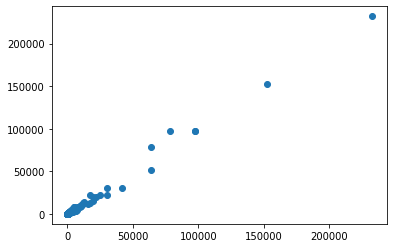

In [23]:
plt.plot(data_lca_desc.iloc[6,:],data_non_desc.iloc[,:],'o')

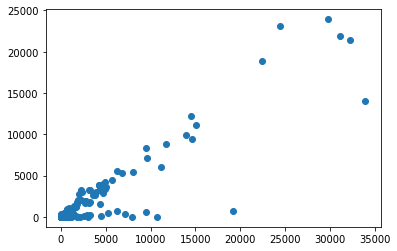

In [26]:
# Plotting against the mean
plt.scatter(data_lca_desc.iloc[1,:],data_non_desc.iloc[1,:])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


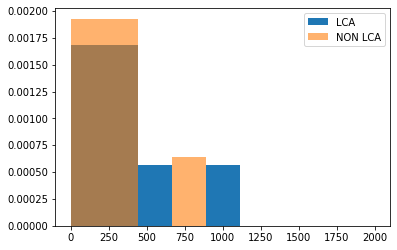

In [44]:
bins = np.linspace(0, 2000, 10)
plt.hist(data_lca_desc['feature-1180'], bins, alpha=1, normed=True, label='LCA')
plt.hist(data_non_desc['feature-1180'], bins, alpha=0.6, normed=True, label='NON LCA')
plt.legend(loc='upper right')
plt.show()